In [ ]:
#!pip install xgboost

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import scipy.stats
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
df=pd.read_csv("cStick.csv")
df.head(50)

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
5,27.160,1.0,102.584,64.320,88.580,1.0,1
6,57.134,0.0,70.824,73.690,93.690,0.0,0
7,66.356,0.0,84.816,78.460,98.460,0.0,0
8,60.382,0.0,75.752,75.370,95.370,0.0,0
9,23.170,1.0,99.658,56.340,86.585,1.0,1


In [8]:
df['Decision '] = (df['Decision '] >= 1).astype(int)
df.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,1
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0


In [42]:
df2=df.drop('Accelerometer',axis=1)
df2=df2.drop('Pressure', axis=1)
df2

,Distance,HRV,Sugar level,SpO2,Decision
0,25.540,101.396,61.080,87.770,1
1,2.595,110.190,20.207,65.190,1
2,68.067,87.412,79.345,99.345,0
3,13.090,92.266,36.180,81.545,1
4,69.430,89.480,80.000,99.990,0
...,...,...,...,...,...
2034,5.655,116.310,162.242,71.310,1
2035,9.660,124.320,177.995,79.320,1
2036,15.220,93.828,40.440,82.610,1
2037,9.120,123.240,175.871,78.240,1


In [43]:

# Assuming df is your DataFrame and 'Decision' is the target column

# Split the DataFrame into features (X) and target (y)
X = df2.drop('Decision ', axis=1)
y = df2['Decision ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=46)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=1)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Print a success message
print("The Decision Tree model has been successfully created and trained.")

The Decision Tree model has been successfully created and trained.


In [9]:
#df2=df.drop('Accelerometer',axis=1)
#df2=df2.drop('Pressure', axis=1)
#df2

In [39]:

# Assuming df is your DataFrame and 'Decision' is the target column

# Split the DataFrame into features (X) and target (y)
X = df.drop('Decision ', axis=1)
y = df['Decision ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=46)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=1)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Print a success message
print("The Decision Tree model has been successfully created and trained.")

The Decision Tree model has been successfully created and trained.


In [44]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Accuracy: 0.9940087145969498
Balanced Accuracy: 0.9910130718954249
Precision: 0.9910931174089069
Recall: 1.0
Sensitivity: 1.0
Specificity: 0.9820261437908496


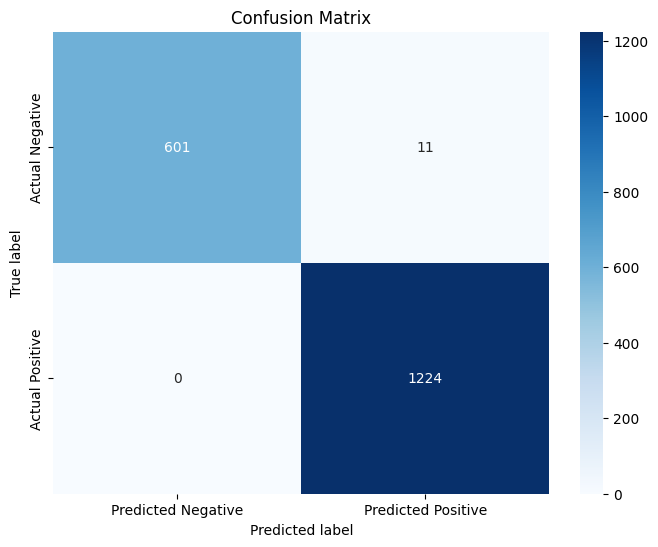

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code
y_pred = clf.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [46]:
import xgboost as xgb
from xgboost import XGBClassifier

# Transform the DataFrame into DMatrix format
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
xgb_clf = xgb.train(params, dmatrix_train)

# Make predictions
y_pred_xgboost = xgb_clf.predict(dmatrix_test)
y_pred_binary = [round(value) for value in y_pred_xgboost]

# Evaluate the XGBoost model
accuracy_xgboost = accuracy_score(y_test, y_pred_binary)
balanced_accuracy_xgboost = balanced_accuracy_score(y_test, y_pred_binary)
precision_xgboost = precision_score(y_test, y_pred_binary)
recall_xgboost = recall_score(y_test, y_pred_binary)

tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred_binary).ravel()
specificity_xgb = tn_xgb / (tn_xgb + fp_xgb)
sensitivity_xgb = tp_xgb / (tp_xgb + fn_xgb)

print("The XGBoost model has been successfully created and trained.")
print(f"Accuracy (XGBoost): {accuracy_xgboost}")
print(f"Balanced Accuracy (XGBoost): {balanced_accuracy_xgboost}")
print(f"Precision (XGBoost): {precision_xgboost}")
print(f"Recall (XGBoost): {recall_xgboost}")
print(f"Sensitivity (XGBoost): {sensitivity_xgb}")
print(f"Specificity (XGBoost): {specificity_xgb}")


[10:38:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


The XGBoost model has been successfully created and trained.
Accuracy (XGBoost): 1.0
Balanced Accuracy (XGBoost): 1.0
Precision (XGBoost): 1.0
Recall (XGBoost): 1.0
Sensitivity (XGBoost): 1.0
Specificity (XGBoost): 1.0


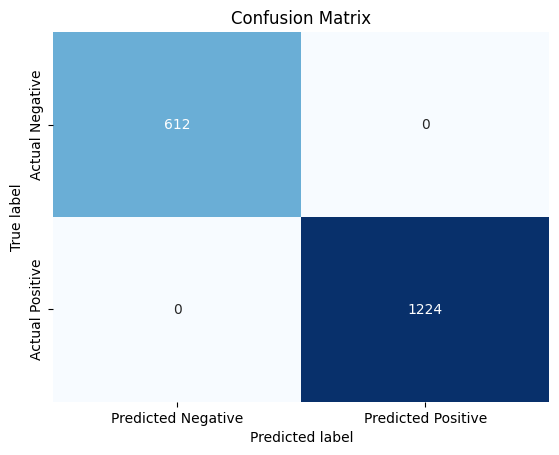

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

In [48]:
df2=df.drop('Accelerometer',axis=1)
df2=df2.drop('Pressure', axis=1)
df2

,Distance,HRV,Sugar level,SpO2,Decision
0,25.540,101.396,61.080,87.770,1
1,2.595,110.190,20.207,65.190,1
2,68.067,87.412,79.345,99.345,0
3,13.090,92.266,36.180,81.545,1
4,69.430,89.480,80.000,99.990,0
...,...,...,...,...,...
2034,5.655,116.310,162.242,71.310,1
2035,9.660,124.320,177.995,79.320,1
2036,15.220,93.828,40.440,82.610,1
2037,9.120,123.240,175.871,78.240,1


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Downsampling
# Identify the majority and minority classes
majority_class = df2['Decision '].value_counts().idxmax()
minority_class = df2['Decision '].value_counts().idxmin()

# Separate majority and minority classes
majority_data = df2[df2['Decision '] == majority_class]
minority_data = df2[df2['Decision '] == minority_class]

# Downsample the majority class to match the number of samples in the minority class
majority_downsampled = resample(majority_data, replace=False, n_samples=len(minority_data), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_df2 = pd.concat([majority_downsampled, minority_data])

# Split the balanced DataFrame into features (X_balanced) and target (y_balanced)
X_balanced = balanced_df2.drop('Decision ', axis=1)
y_balanced = balanced_df2['Decision ']

# Split the balanced data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=46)

# Create a Decision Tree Classifier
clf_balanced = DecisionTreeClassifier(max_depth=1)

# Train the model using the balanced training sets
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Print a success message
print("The Decision Tree model with normalization and downsampling has been successfully created and trained.")


The Decision Tree model with normalization and downsampling has been successfully created and trained.


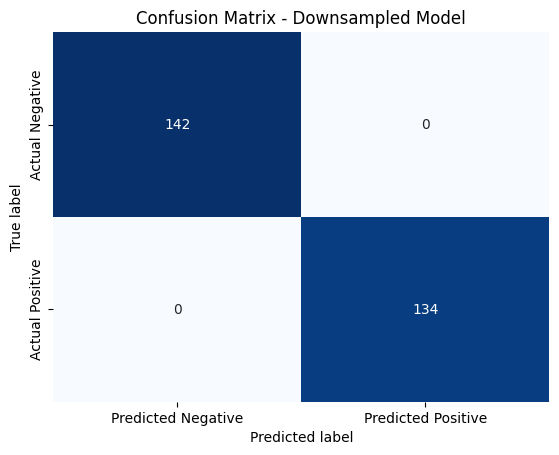

In [50]:
# Make predictions on the downsampled test set
y_pred_balanced = clf_balanced.predict(X_test_balanced)

# Calculate confusion matrix for downsampled model
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

# Plot the confusion matrix
sns.heatmap(conf_matrix_balanced, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Downsampled Model')

plt.show()
